In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]


In [3]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [4]:
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [16]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?',
    '[https://google.com/hello/world.html]',
    'Tel: +94712096086'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index



In [17]:
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)





Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11, 'https': 12, 'google': 13, 'com': 14, 'hello': 15, 'world': 16, 'html': 17, 'tel': 18, '94712096086': 19}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11], [12, 13, 14, 15, 16, 17], [18, 19]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]
 [13 14 15 16 17]
 [ 0  0  0 18 19]]


In [7]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


# sarcasim

In [11]:
import json

with open("./tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)

29657
{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could': 87, 'we': 8

In [13]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [18]:
print(tf.__version__)

2.5.0


In [19]:
!pip install -q tensorflow-datasets

In [20]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [22]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\DELL\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [23]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [65]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [66]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print(padded[3])
print('--------------------')
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print('--------------------')
print(training_sentences[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   12    7    2  241    5   20   16    4 8776 2707 2653
   52    2  358    5    2  180   68  138 1401   17   92  203  968   15
   23    1   81    4  192 3109 3037    3    1   16    4  376    5  632
  387  352   37 6355    3 5559 1928   15  208 8596 3433    2  112  365
   48   24   55    1    6 1657   55 1818 4312   41    4 2263    3 1908
    1  141  160  780  111   31   92  116    4  221   20    9  173  279
    3   29   13 1012    2 2814   10 1985]
--------------------
? ? ? ? ? ? ? ? i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no 

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [68]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.4934 - accuracy: 0.7415 - val_loss: 0.3380 - val_accuracy: 0.8526
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.2469 - accuracy: 0.9034 - val_loss: 0.3576 - val_accuracy: 0.8446
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.1120 - accuracy: 0.9679 - val_loss: 0.4417 - val_accuracy: 0.8280
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0326 - accuracy: 0.9955 - val_loss: 0.5220 - val_accuracy: 0.8251
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.5893 - val_accuracy: 0.8238
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.6455 - val_accuracy: 0.8260
Epoch 7/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6923 - val_accuracy: 0.8274
Epoch 

In [69]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [52]:
weights

<tf.Variable 'Variable:0' shape=(9999, 16) dtype=float32, numpy=
array([[-0.05307949, -0.01494469, -0.01329443, ...,  0.05292709,
        -0.00238496, -0.00748477],
       [-0.01518786, -0.02804589,  0.01159094, ...,  0.00063197,
        -0.03884986, -0.0289491 ],
       [-0.02840956,  0.0241877 ,  0.02572568, ..., -0.03526719,
        -0.06998494, -0.01105358],
       ...,
       [ 0.01522509, -0.09460985,  0.00486606, ..., -0.07568313,
        -0.0426033 , -0.02866383],
       [ 0.08852842, -0.13360316,  0.09082974, ..., -0.14179592,
        -0.06197827,  0.05155605],
       [ 0.05802033, -0.03764999,  0.10498226, ...,  0.09690287,
        -0.08645379,  0.05129829]], dtype=float32)>

In [74]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [35]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


In [58]:
for subwords in word_index:
    print(subwords)

<OOV>
the
and
a
of
to
is
br
in
it
i
this
that
was
as
for
with
movie
but
film
on
not
you
are
his
have
he
be
one
all
at
by
an
they
who
so
from
like
her
or
just
about
it's
out
if
has
some
there
what
good
more
when
very
up
no
time
she
even
my
would
which
only
story
really
see
their
had
can
were
me
well
than
we
much
been
bad
get
will
do
also
into
people
other
first
great
because
how
him
most
don't
made
its
then
way
make
them
too
could
any
movies
after
think
characters
watch
two
films
character
seen
many
being
life
plot
never
acting
little
best
love
over
where
did
show
know
off
ever
does
better
your
end
still
man
here
these
say
scene
while
why
scenes
go
such
something
through
should
back
i'm
real
those
watching
now
though
doesn't
years
old
thing
actors
work
10
before
another
didn't
new
funny
nothing
actually
makes
director
look
find
going
few
same
part
again
every
lot
cast
us
quite
down
want
world
things
pretty
young
seems
around
got
horror
however
can't
fact
take
big
enough
long
thought
tha

bag
medical
crisis
fbi
perform
stranger
pride
dislike
reed
per
controversial
technique
patient
sexuality
succeed
wasting
suffered
enjoyment
sings
tied
whereas
separate
lincoln
uncomfortable
gripping
holmes
ourselves
hundred
noble
glimpse
shines
franchise
ensemble
reunion
60's
courage
card
contact
irony
shorts
atmospheric
infamous
millions
hint
neat
exceptional
plastic
pack
ralph
connected
drink
scripts
oscars
italy
sandler
searching
proof
storm
holiday
mst3k
letting
nose
performers
aired
sentimental
flash
snow
lying
curse
hills
helen
grey
steps
idiotic
meaningful
entry
suggests
sons
quote
tune
dancer
weapon
knife
chasing
plague
cameos
perfection
consists
hoped
hiding
troubled
accepted
lovable
noted
develops
unforgettable
thousand
kurt
fortune
larger
equal
condition
portrait
colorful
stretch
basement
miscast
annoyed
spots
attraction
chases
woman's
brooks
virgin
saves
host
bettie
assistant
dear
belongs
16
worry
stealing
terrifying
protagonists
burning
pg
month
horses
gain
oil
cousin
shoo

21st
repulsive
compete
owners
weaker
rides
unlikeable
seedy
stare
masterfully
vastly
inspirational
located
hugely
guards
disguised
owes
des
scariest
boris
affects
1994
error
nominations
modest
addict
candidate
bronson
linear
applaud
statue
bulk
akin
narrow
tara
homes
advertised
rapidly
sometime
child's
wrenching
gimmick
grounds
injured
miami
votes
crashes
dim
contribution
poker
jared
shell
coat
jess
alvin
critique
cinemas
cartoonish
refers
freeze
hers
30s
washed
deer
gods
puppets
loretta
banter
internal
wardrobe
origin
randolph
breakfast
mitch
dubious
casino
miniseries
leaders
conrad
relentless
timberlake
chronicles
bloom
continuing
thirties
inaccurate
youthful
caricature
factors
son's
motive
where's
dazzling
headache
expertly
homosexuality
strengths
hires
mason
lasts
las
youtube
excellently
bones
antonio
undeniably
ingrid
swallow
standout
lauren
stunningly
convicted
nolte
corn
spine
reward
joker
mol
zizek
bates
vehicles
christina
nina
buzz
screenwriters
unsuspecting
audition
scifi
nat

steamy
stumbling
rizzo
400
neeson
temporary
passive
benoit
neglect
jew
behalf
moore's
farewell
parents'
borderline
locales
zealand
rko
snatch
balloon
naval
janitor
welcomed
country's
muted
bombing
keitel
rusty
gays
expand
inhabited
amok
stalks
theirs
rapture
dogma
impeccable
backdrops
fitzgerald
dodge
carnival
stature
unemployed
martino
thorn
toe
smarmy
counterpart
irresponsible
honey
straw
truthful
mcdermott
wwi
rugged
shamelessly
retelling
culkin
behaves
weaver
tested
watered
heavens
interspersed
roommates
islam
adequately
tango
chocolate
intellect
placing
versatile
gage
posh
bucket
pour
liz
stimulating
treating
izzard
assortment
anonymous
imitating
redgrave
limbs
yearning
poke
crenna
norton
architecture
existential
sailors
compassionate
pranks
jolly
cheung
honeymoon
rewrite
mcadams
guided
leaps
payne
climbs
roads
largest
archer
grady
worldwide
cheat
hug
gee
eastwood's
peterson
pertwee
stretches
opponents
overwhelmed
taker
concludes
melt
custody
hector
agatha
burden
kamal
crass
acade

resorts
matador
dwarfs
knit
ethereal
gloriously
suicidal
brooks'
ropes
slaps
82
reflective
ann's
attendance
hearty
revered
forming
fortunes
bullshit
corrupted
venice
diversion
avail
firefighters
anna's
accompanies
trading
storms
glue
amazes
prices
strangled
indirectly
iris
depalma
healed
analogy
guiding
ferrer
doubtful
compensated
curtains
spouting
seamlessly
gracefully
poop
coastal
decadent
togar
arctic
slit
handing
reacts
persistent
concluding
cylons
brightest
faithfully
overhead
specials
mona
lsd
andie
warners
revived
spins
elicit
shakti
ailing
dante's
despised
depraved
disillusioned
amnesia
dis
russel
webster
pipes
experimenting
swordplay
relegated
outings
cambodian
mat
unscathed
broadcasting
doe
page's
proposal
budapest
keystone
enthusiastically
gains
televised
ava
collected
leaning
kiddies
toddler
scholarship
infuriating
greenwood
painters
hostages
tearjerker
serbs
34
rains
needn't
dudes
lair
dumbed
granddaughter
romy
goebbels
poirot
terrorized
inventing
fahey
spacek
microphone
s

moonlight
three's
criticised
comers
curry
notebook
corrected
repetitious
metropolitan
jeffery
embraces
assaults
villages
flashed
crashers
socialite
resists
woodstock
eliza
inert
manual
gunbuster
juxtaposition
activists
out'
commitments
speculate
automobile
slant
ironies
bain
negligible
duckling
hawks
£1
scathing
foreigner
offends
zadora
perry's
lumet's
tabloid
courts
me'
bangkok
priced
helmer
arden
cartoony
catwoman
purports
moms
schlesinger
enamored
mamie
abandons
vanish
coloured
salad
isle
rundown
infused
warranted
pointe
forensic
taboos
rays
sped
mortgage
nitpick
baptist
didn
termed
michigan
cortes
dispatched
vanities
attenborough's
contractor
embodiment
pointlessness
something's
denny
dreyfus
johnnie
beams
judith
onstage
chawla
collectors
waco
largo
otis
suitors
fuse
slipper
hungary
peg
clayton
overview
lucid
writhing
brushes
topical
exploitive
swallowed
cranked
genetically
infernal
undermine
coulouris
mythic
prophecies
grisham
cutouts
jacobi
marky
potts
grossing
envisioned
shelton

'r'
undeservedly
culturally
enslaved
dismembered
blanche
savor
unprepared
substances
retail
sanitarium
virulent
determines
mcphillip
handicap
pinup
garam
embody
stamped
lieu
zemeckis
targeting
macgyver
harris'
hawkins
spontaneity
fondling
bogie
marsden
guerilla
scots
orphaned
triggers
drank
cultivated
situational
theatrics
vicariously
abridged
cacoyannis
undoing
proficient
dudikoff
massacred
vida
cody's
jaime
o'conor
immersion
dalton's
shimizu
offence
stroker
upstate
racket
pretenses
bulgaria
transfers
'we
cuss
stitzer
fuels
wuthering
gaunt
tics
broom
deux
stewardess
noonan
sandwiches
blackout
impostor
rhino
noose
offending
searchers
photographing
territories
instill
gadget's
dispense
garry
o'connell
tolstoy
shear
mocks
unleashing
pander
diplomatic
duke's
slipstream
sweethearts
lifeboat
improbably
stench
infancy
realms
oldies
hammers
zenith
tmtm
pork
surgical
outstandingly
dawns
symbolically
trenholm
grad
teases
fared
flik
fetishes
scholar
cutie
despises
comparative
blinking
fatigue
ti

bids
mounts
heartrending
umpteenth
unspeakably
cinephiles
affirmed
c3po
monumentally
lurk
napolean
mst3000
bogdanovich's
sec
highschool
outshines
intimidated
witchy
undercurrents
grace's
chords
leona
dominion
sega
extinguisher
lodoss
reproduced
opinionated
closeted
scorn
tory
contemptible
narcotics
resultant
orientated
group's
summer's
courted
motorcycles
studly
cycling
btas
chris'
periphery
reptiles
foreseeable
bloodsucker
legit
unashamed
sublimely
combinations
beholder
spurned
kangwon
modernized
stomachs
slender
scrolling
ruggero
deodato
sushmita
basanti
esha
thakur
ambiguities
dent
'actors'
'special
underappreciated
fiancé's
condon
bombarded
cronenberg
hoops
breeds
swallows
snacks
siobhan
gunnar
jolting
syfy
ziering
insider
intently
macross
compromises
versailles
revenue
brigante
puffy
symbolized
prosperity
prevailed
idealist
tatsuhito
underplayed
mournful
'adult'
brandy
mobs
stupidities
shorthand
holbrook
gregory's
contrives
lessened
juanita
motto
croatian
remembrance
reg
forcefull

composes
dissipate
laboriously
urbaniak
lommel's
tarnish
tempers
agreeable
gussie
encased
underline
donors
penry
ariel's
pervading
examiner
belive
sheedy's
multiplexes
conceivably
meso
lohan's
styne
belligerent
diatribes
sickened
spawns
accolade
elevating
euripides'
euripides
carts
revisits
priestly
complementary
later'
leatrice
foreseen
brandishing
fleshing
zwick
remastering
rozsa
vilified
clergy
apes'
minutiae
predicts
mobility
rainman
vagabond
incorrectness
hounding
prairies
arrests
'83
infinitum
flamboyance
decors
burt's
hadley's
legolas
sauron
boromir
fdr
pt
wounding
disapproval
elvis's
kernel
luminescent
storytellers
sighs
1900
resourcefulness
fastidious
handkerchief
faulkner
mma
professor's
lotta
pall
foiled
satanist
improvisational
superchick
liable
serb
shipwrecked
tagalog
jürgen
kuriyama
webs
sanctioned
flagging
gérald
laudenbach
d'
cove
primetime
rappaport
transmitting
impervious
adrianne
unsinkable
daydream
levant's
symbolizing
waterworld
10's
heavyweights
enveloping
ensure

rainbeaux
zesty
monaco
sergius
implants
weathered
timetable
halting
mambo
teleprompter
expletive
adriana
wiseman
dorado
scholarly
rothschild
deployment
kosher
buddy's
'young
absolutley
divorces
evinced
towelhead
superlatives
najimy
dissapointment
blinked
mortar
mincing
existentialism
desultory
see'
macchio
testifies
watermelons
tesis
sushi
dovetails
membership
heorot
interconnected
reeler
cremated
acknowledging
patrolman
holm's
leash
kunal
sharman
samba
hymn
labourer
shite
bugging
tarr's
explainable
doused
dart
tristan's
maneuvers
club'
'lost
reilly
pragmatic
carroll's
swamped
beckinsale's
technologically
germanic
goldberg's
'hollow
emasculated
sartre
posterior
toil
portland
dandy's
platter
iturbi's
reforming
sinus
correspondent
souvenir
neagle
alignment
multifaceted
screamer
inspectors
distort
macabra
ancestral
frightworld
sabotaging
totality
miseries
overstay
testa
piers
'big'
lounging
halted
liebman
squeals
chipper
lighters
hobbs
screwdriver
canted
skis
excites
krupa
cunnilingus
hoa

eschewed
wheezing
m1
gi's
knockoffs
shoehorned
grandmaster
pryor's
store's
subscribed
1880s
keir
206
bure
freemasons
hell'
glands
2017
fer
ranted
khakee
aryeman
verducci
whatsit
unmoving
mcclane
werewolf's
toyed
capitalise
ratner
wardens
59
devo
wimpiest
reduction
installations
religiosity
lenoir
masquerade
50th
voiceovers
wand
hinder
hercule
womanising
blanchett
lanka
pidgin
fluently
weasels
naudets
segregated
rathbone's
revamp
fillion
romulus
cassettes
commandeered
embattled
bogosian
'interesting'
yardstick
gnome
frailties
hindrance
lobe
commemorate
novelties
varma's
squarepants
compensations
'evil'
do's
inventively
lina
waiters
overalls
'00s
formless
narcotic
grievous
salaries
'84
surfeit
blockade
engenders
lifer
soliti
ignoti
lui
cinephile
1905
unfortunatly
sincerest
flitting
hebetude
inglorious
conqueror
jerked
calitri
burgers
esophagus
kerchief
emulates
isms
keepers
1408
shortchanged
pimples
intestinal
yellin
lyricism
kino's
osric
hyping
spurlock
chrissakes
abductor
disobeys
jogg

secretions
minerva
urecal
patricia's
heigl's
budd
merton
sherriff
undertext
yamaguchi
accordian
auspices
sociologically
mikael
viscerally
scorpio
sprinkles
godfather'
putative
divergent
matewan
tachigui
kawai
pangs
panamanian
infiltrated
creaked
feigned
freakout
migrant
fatter
lard
adhering
tampa
espn
fabrications
atoll
englund's
mendacious
endorsed
sweatshirt
delineated
regress
initiating
practitioners
'true'
anathema
intrudes
souvenirs
sandbox
artefact
irwin's
disassociate
smalltown
jeopardize
leave'
finnegan
wrestlemanias
washout
wraith
swooping
270
deviate
therapeutic
'1'
posited
burakov's
gloster
prepped
emulated
salesgirl
rejuvenates
pollack's
anthems
ahmed
pinks
indi
vandals
seep
'85
parmistan
muncie
iam
addams
mortis
fn
critics'
poseidon
bree
octavian
instantaneously
coroner's
leaks
onetime
galindo
alejandra
charly
armoury
entices
smoker
sergent
99p
denys
spirit'
hauptmann
gardner's
bean's
kooks
staccato
ludvig
tatanka
armourae
macaw
itier
slobbering
shouldered
straitjacket
pee

grifter
winstons
hotch
potch
hollister
skillet
temple's
bellucci
duchovony
surfboard
induction
luz
coeur
heresy
forever'
dinosuars
vindictiveness
stainless
deran
omelet
schlub
engle
lifetimes
meathead
bartlett
nation'
voigt
disaffected
reclaims
peeve
hollis
wannabees
grill
cn
magnanimous
i's
godfathers
mcafee
merkle
sodding
osteopath
decrease
rohinton
mistry's
spain's
cromwell's
troublemaker
prostitute's
penny's
fields'
cote
goyôkiba
hanzo's
indiscreet
basin
voyeurs
puzo's
puzo
sailplane
hypnotise
udder
arwen
mortensen's
pepoire
lolly
jealously
'metal'
tis
instructive
cultivate
uncomprehending
nauvoo
gonzalo
rootless
carfax
prolonging
excercise
'retarded'
plummeting
jarryd
helin
bonhoeffer
fighter'
lindum
storm'
sharpness
downturn
'flushed
flannel
jarrell
nang
mirai
kabei's
entanglements
lineage
regurgitation
clarification
producers'
willaim
cartouche
depleted
danis
nowheres
stemming
yasmin's
fiorentino
schwimmer's
mcgreevey
mumy
butthorn
orthodoxy
trudging
atlantic'
'rose'
who'
cerebr

maud
rebellions
distributer
bordeaux
gape
clenching
ped
big'
plexiglass
reiner's
azuma
kazuma
steelers
frequencies
commodus
refrains
sift
humpback
modernize
zurich
steelworker
manchu's
mateo
ritt
actionpacked
mk2
urinal
traffickers
terminus
postrevolutionary
priveghi
disparities
retiree
peron
qa
cutscenes
fueling
venantini's
migrate
nippy
vegetarians
rated'
gummint
latched
grappled
powerbomb
swanton
showboat
dropkick
y2j
lionsault
goaded
lesnar
whirled
booker's
networking
bischoff's
pledging
rebounded
retaliated
peddlers
eroded
omigod
valleys
glencoe
cheeze
beaded
bead
fellow's
briget
rosey
d'orleans
plonked
tacoma
charis's
od'd
falco's
clicheish
ramundo
reawakened
slayings
declamatory
mconaughey
mcgaw
islander
lilting
flannery's
justice'
farentino
hirschbiegel
vaguest
reaffirming
poli
suzanne's
purposeless
kosleck's
jeniffer
pricks
disneyfied
batista's
cabana
stamps
bowdlerised
lotte
lenya
betuel
aligns
copola
bluebeard
filmable
objectify
niemann's
ismaël
mohamed
majd
ferroukhi's
fors

actors's
defa
discomfiting
flayed
tz
mahayana
rhetorically
rte
excelling
auditor
frontiersman
lurched
guffawed
suspenders
garter
determinate
mermaid's
westway
standpoints
schneerbaum
dahmer'
scoped
thrice
moonlights
alik
kora
home'
undercooked
nbb
reaping
marmaduke
oldfish
contributers
infer
headstone
chisel
dinky
metrosexual
sharikovs
unawares
palettes
maclaughlin
epochs
dehavilland
lefler
reveled
punctuates
domenico
footloose
jackhammer
'tango
'poltergeist'
rubenstein
cancun
althou
handycam
towing
tutsi
borneo
roper's
'post
adr
greenery
kristoferson
agonizes
qualitative
clubberin
kellogg
smg
mcdevitt
estrada
'average'
warming'
oneliners
ar
convict's
wafers
pastorelli
'emmanuelle'
sleazefest
emy's
pricked
resuscitate
entomologist
coaltrain
gameboy
inducted
advisedly
tooled
dufus
everyway
slobby
pacifier
rånarna
inebriation
landslide
o'briain
labouf
adventuring
imbred
cinematics
tsutomu
anulka
armatures
forrests
andersons
nauseates
dictum
hollwood
'team
garnished
ri
missable
macclane
d

counterbalanced
winging
disorientated
'bruce
cm
thickening
specificity
rewinds
he
shriveled
parekh
laundered
essex's
waxman
for'
betacam
overweening
ashoka
bobcat
wiggly
saturdays
moaned
immeasurable
fsn
monger
optimist
'cowboy'
discernment
peasantry
underhand
wormwood
klemper
transvestism
rajah
'nother
serguis
'46
rumpelstiltskin
waalkes
ring's
horsing
quin
excretion
calcium
disassemble
braille
expert's
electrocuting
confining
o'quinn
swerves
kik
purposed
for
folder
sharron
bluest
sands'
payday
kayo
gaijin
pian
vanquishing
beefs
chal
millionth
zhigang
zhao
grammatical
nemo'
hughie
fruit's
jabber
rationalized
joes
midas
ryck
groot
hinterlands
cheatin'
transvestites
preparatory
yankovic's
youthfulness
ter
leech
crossers
wringer
adulterer
teflon
stagnated
clustering
mallrats
entei
adair
bratwurst
snares
valentines'
caan's
mason's
apposed
1500s
geek's
minstrels
'flying
lot'
tos'
st's
magnificant
pasteur's
liza's
stringent
colorfully
rogues'
gottlieb
bbs
satiated
reconstitution
getter
k

remedios
gillmore
'role'
lourenço
júlio
bas
candleshoe
'extreme'
funnel
famines
ragland
lawston
longueurs
carne's
undertakers
halmark
cray's
'kôhî
jikô'
sticklers
puppo
lupo
orleans'
exhibitors
melonie
applicability
duffel's
unreachable
pheiffer
gorris'
kakka
simms'
tucci's
impairment
cerletti
bobo
federline
scrubbers
piznarski
corley
dutton's
spall's
shakily
maiko
romulans
backtrack
breadsticks
yee
cori
wynona
technocrats
council's
wotw
bader
jia
advertized
pelicangs
recriminations
miranda's
phantasms
jb
pirouette
fritchie
enriquez
lankford
hansom
'emotion'
graph
rakhi
sawant
bigg
traci's
fishtail's
petersson
lousiness
aiken's
overage
calicos
laxman
wonka
unexploded
mick's
inequities
palliates
'before
vculek
all
thermal
blondell's
eek
sonya
cuffs
marrow's
cbc's
aweful
necessitating
frf
riposte
nbk
unwatchability
bytes
fluctuations
upholds
takeovers
minnesotan
qur'an
surrah
hellfire
'urf
kollos'
priori
8230
vh1's
cept
misunderstands
carley
board's
naudet's
wtc2
carradines
'odyssey'
10

broon
'sunday
post'
'mighty
moose'
wedding'
'mollycoddle'
everson
dismissively
stanly
schemers
blystone
jackalope
sycophantically
unpatronising
suit's
'painful'
sopisticated
disbanded
mcarthur's
steampile
storekeeper
barabra
overscaled
caribean
rowdies
literates
nadu
lifesaver
teens'
leonie
'rotten
denmark'
about'
gods'
haddad's
curve's
'tennessee
tease'
glossies
ascendance
'glory
'resurrection'
pappa
obvlious
decerebrate
hamburglar
embryos
creep's
ondricek's
septej
simpley
embroidering
welle's
gilroy
faxes
artisty
insititue
embroider
aleination
tc's
'coerced
'into
amenábar
'damsel'
hausman
'mom
19thc
wireframe
steampunk
topmost
dola's
rerecorded
critially
beek's
sheeta's
jal's
01pm
jmv
gc
palette's
hille
steenky
duffer
moranis's
matted
brides'
hammily
manifesting
hammiest
coctails
servile
kiesser
willcock
pawning
hinge
sophisticatedly
huitieme
dormael's
marietta
''professionals''
denier
montenegrin
chetnik
ustashe
partisans
fyrom
croatians
''little''
inacessible
nicmart
dvdbeaver
dvdc

fukasaku's
frostbitten
454
raphael
recorders
mhmmm
pictograms
mned
paella
gifters
aborting
lancie
biarkan
bintang
menari
bbm
indonesians
indonesia's
gangee
upruptly
caradine
bandaras
umcompromising
dao
nofth
daoism
unstylized
sacredness
bullcrap
ajay's
ati
wiesz
redbone
sulfur
'greedy'
academy'
reappropriated
himand
paglia
dorkness
tlog
you'r
unshaved
tzigan
largo's
precictable
hindley
wassell
miljan
reunifying
maximillian
manassas
mckinley
kantor's
ruinous
moodily
moed
elusions
poopers
jeongg
kerri
righetti
wain
billingham
innerly
harmoniously
threefold
approachkeaton's
upsidedownor
rebours
timeand
epochsin
timesin
mohammedan
moviesone
virtuouslypaced
ostentatiously
popeyelikethe
rivalskeaton
funyet
ariana
ghostbuster
atreides
starfighter
flightsuit
inchworms
ppv'd
schmoozed
sjöberg
gossiper
ilva
lööf
holmfrid
rahm
jähkel
teorema
paraíso
demensional
bouchemi
brusk
unforgetable
morbuis
claustraphobia
cobblestoned
mcphillips
mclaglin
jihadists
duplis
multiethnic
mutiracial


'hoping'
'few'
gyu
'splendor
'picnic'
poignance
comanche
f22
banner's
faker
betrothal
unbenownst
schygulla's
bagpipes
battlements
eggplant
squawks
konnvitz
absolutelly
floozie
comteg
silliphant
van's
raptus
bardeleben
resigning
grandmasters
adjournment
xzptdtphwdm
tryfon
watcher's
languishes
brawlin'
outlasting
outliving
fleischers
papers'
'mime'
brooms
seeding
undoubetly
sànchez
arcades
camaro
noooooooooooooooooooo
rukjan
ballentine's
lenser
rapacious
snickets
anxiety'
unkown
appall
bhi
laath
jyaada
musalmaan
hindustaan
hukum
shobha
atrophy
tosca
fight'
untypically
sedately
swash
flecked
herts
monstroid
pai
feng
changs
trellis
characters
then
reposes
houses'
developmental
asia's
buckheimer
horticulturalist
sedating
plume
'thinner'
hardyz
afterword
dropkicks
buyrate
layla
makowski
tandon
jawab'
pukar
lajja
sensitive
'khakee
aishwarya's
mehta's
ordinator
moughal
santoshi's
tessering
greedo
centaurion
bowlegged
becomea
wookies
ixchel
painlessly
ladys
deary
gawping
ropier
escalators
m

americas's
lauter
mmt
barkers
mihaela
radulescu
word's
microchips
computerised
cyhper
nueve
reinas
shiniest
larcenist
'siren'
pakistani's
freakiness
sidede
schwarzmann
autobiograhical
unsympathetically
repudiation
150m
waitressing
novelized
bodysurfing
kalama
snider
hairband
ratt
'55
posh's
britannia
spices'
'celebrity'
betta
gtf
disharmonious
boal
duval's
forcefulness
deference
emmas
woefull
boy
russwill
sahibjaan
fountained
bonanza's
daresay
prarie
ranchhouse
conspirital
stuyvesant
starpower
predictibability
decaffeinated
lurie
siberia
collectivity
grapevine
landscape'
substanceless
repudiate
spectactor
nightsky
alexei
derric
'superman
unjustifiably
s2t's
superman
leung's
excersize
eyebrowed
comparitive
decoteau's
'tank'
tank's
untwining
antecedent
c57
'monsters
ring2
jaysun
rettig
verbs
panpipe
annabeth
hedeen's
'pearl
harbor'
kielberg
'superheating'
incubates
superheating
evaporate
serviced
cratey
gretzky
lanoir
qwak
drion
timsit
incipient
thingamajigs
indestructibility
fooler
p

fonze
imposable
slowwwwww
tideland
brownesque
raisingly
leporids
hares
clarmont
bailsman
zering
clerking
charters
niggaz
shoot
ev
vespa
bedknob
naboombu
surnow
napping
'aving
'oo
entwistle's
tassel's
shaking'
overture
pcm
details
cheadles
sandlers
additive
outers
'manager'
harrassed
seond
ozjeppe
lovehatedreamslifeworkplayfriends
'technician'
aames's
aames'
antoni
aloy
mesquida
bonet's
pamphleteering
nilo
mur
lozano
sergi
'john'
ramala's
cassamoor
peracaula
navarrete
mckoy
'pickpocket
raposo
raggedy's
unico
'requiem
'fear
'candy'
'go'
'halfbaked'
smokling
'loaded'
jook
choir's
knowledgement
gony
neutralized
jgl
reunification
baseball's
dk
cinci
pearlstein
massacrenot
ramie's
classist
'traveling'
living'
colourised
caroles
parris
accost
unibomber
supervan
lasars
joies
frittering
rosalind's
allocation
unaccomplished
screenacting
ya's
dvx
100b
lemac
borkowski
whichever
craved
same
cronnie
accrutements
bentley's
like
clichéed
mel's
inde
meddings
js's
educators
rotc
daman
spittle
leiut

9do
albizu
fulls
politicized
victimizing
damaris
maldonado
'storm
trooper'
convulsed
donahue
3who
tdd
grumpiest
miri
mudd
colorous
throlls
'dinnerladies'
exploitatively
'therapy
exploration'
acquiesce
dinnerladies
ribaldry
ecgtb
itc
decimation
segrain
jarre's
calito
haige
qaeda
hobson's
unsolicited
ainley
tresses
bigamy
'united
mutinous
starfleet's
uhura
shuttlecrafts
taupin
katana's
heiki's
genji's
shinto
headlock
grunner
imus
marlboro
titltes
500lbs
15minutes
25mins
intermediate
njosnavelin
iman's
unprofessionals
suggestible
me'style
ourdays
gracelessness
have'nt
clichées
malplacée
hoppy
crahan
raleigh's
scallop
pressuburger's
shoes
krafft
ebing's
kindergartener
batpeople
batperson
teat
knarl
colton's
luogis
sandbag
revoew
tee's
apallonia
appallonia
nonmoving
canoodling
euroflicks
'intervention'
photograhy
30k
mockmuntaries
outsource
envirojudgementalism
envirofascist
unacted
undirected
adma
beauticin
still'
theremins
rigeur
methamphetamine
kenner's
dartboard
starla
parley
eithier
d

pharmacology
trivialise
r18
thierry's
nortons
barricading
hardnut
lamebrained
kongs
'companions'
dreamgirl
abdullah
sendak
gic
rouged
baryshnikov
quickliy
sentient
fruttis
woad
forgiven'
malformations
fugly
aglae
arriviste
snobs'
splendini's
dematerializing
journalist's
lyman's
bounder
sid's
scarlett's
strombel's
christens
dowagers
metals
palls
dooright
guineas
dubliners
carnotaur
baur
'robbed'
critique's
annen
'hubble'
'selfishness'
ánd
down'
súch
shyest
buttercream
thuglife
subfunctions
yucca
omgosh
'skits'
yips
'manuscript'
rainmaker'
chearator
curbed
confucious
deductments
sarsgaard's
pepperoni
lipsticked
'bushwhackers'
jelled
other
35
probs
begin
kassie
hypercritical
bonsall
seen
why
don't
one
nutjobs
goldfishes
soundbites
reccommend
rr's
rosalyn
rosalyin
tased
let''s
eaglebauer's
kizz
imovie
interlaces
faudel
younes
blackbelts
divvied
duetting
unmystied
whoppers
15's
resmblance
accesible
unflyable
gilliamesque
unsettles
jacque
briers'
'murder'
'frankie
ciro'
bohnen
'slash

xy's
purcell's
halfassing
iwill
rus
filmcritics
bufoonery
shao
implementing
guinneth
resque
hariett
screwup
'amateur'
inneundo
dialgoue
shelly's
bernice's
isuzu
else
one
segall
cameroun's
policewomen
volkswagon
faaar
gday
animalplanet
yeeeowch
reals
grabbin
koala
shotgunning
horticultural
cultivation
hydroponics
indigo
lala
erector
'unrequited
bore'
gerries
moneyshot
leathal
riggs
hometown's
lazers
vaporizes
headbangers
1982s
'invisible
mom'
1961s
woorter
zukor
ging
deletes
contactable
jáaccuse
gance
mfer
poseiden
disjointing
lahti's
carvan
lauuughed
electorate
mcinally's
repetoir
manoeuvred
cameos
twist
another
anotherand
blackmoor
shrills
'bipolarity'
catastrophically
yolu
gutterballs
wahtever
piquantly
roshambo
zuniga's
ingenue's
round
hush'
emma'
surnamed
franker
buba
rietman
underachiever
funnybones
clump
stockbrokers
mh
englishman's
walkin's
egyptianas
androse
orlac
oscer
shirdan
macanally
cristies
oscers
ideologist
colera
shindler's
coincidentially
googl'ing
leopolds
vør

veranda
billowy
earings
cocktales
leisin's
looping
manicurist
sheldrake
judels
sheepishly
cinepoem
heftily
ported
but
'b
schlockiness
'flipped'
4d
dinosaurus
jlo
mopped
mapes
vigourous
nadji's
revivify
nesher
370
minoan
mycenaean
marihuana'
chorion
plateaus
eion
'hetero
sexism'
irresolute
gaskets
oja
hytner
bania
plastique
audi
deficating
wroth
cinders
perc
instrumentalists
saxophonists
slough
dupre
dupre's
mowbrays
'predator'
'untouchable'
'horrible'
'streets
francisco'
hackney
indepedence
sainik
catfish
enviro
reedus
tauted
dubbings
flashbacked
clientele
abides
kindlings
fotog
bookmark
portrait's
'notorious'
deckard
point­
strode's
'rambha'
obnoxiousness
sulphurous
augments
boricuas
wideescreen
comptroller
'kensington
acceded
conroy's
hastings'
pregnantwhat
abdominal
acclimate
philipas
infuriates
'interference'
'bedchamber
'victoria'
'kid'
'moose'
duddley
'small'
'nostalgic'
shevelove
philanderer'
'my'
faust's
wilmington
newscasts
inquirer
hairdewed
gymnastix
lightsabre
grumbled
h

proyas
ffwd
endow
flatfeet
interrogations
alibis
showboating
icb
verneuil's
volney
ies
oracles
crore
kanpur
treatment's
kareeena's
naala
dhanno
snazzily
lakhs
cupping
lamppost
60ties
flowes
slowely
overboard'
smirked
intellectualized
dan'l
gabbing
whippersnappers
transitted
shoals
goodrich's
unstuck
advantageous
chiffon
'47
'65
nobudget
apocalyptically
eotw
hybridnot
wellknown
conventexploitation
convent's
gautier
'tame'
weened
starkest
aprox
so'
synovial
cabbie's
misjudgement
striker
misrepresents
perceptively
hey'
decompression
ironside's
demonized
jw's
recordable
whiteflokati
presnell
darkish
berhard
cavangh
mcwade
etiienne
shad
terriers
cavanagh's
alternations
'mommy'
bustiness
'nether
hemispheres'
'mommy's
boinked
vambo
drule
spinally
disablement
unprofitable
rooks
diddle
inspects
suways
'connect'
shultz
adi
samraj
halaqah
orel
evangelism
revisioning
oks
laureate
stretchs
mumps
livesy
mcswain
grodd
alum
toyman
metallo
darkseid
bj
filmation
batmite
knightrider
brend
chasity
shu

dissatisfying
cameras'
«caught
jar»
dpp's
leidner
leatheran
misjudgements
punster
för
ourt
sssssssssssooooooooooooo
krisner's
'group
1959's
meek's
stinkfest
malibu's
20mins
deille
anbthony
barataria
1812
pardons
ceding
statesmanship
onslow
freshened
nozaki
manley
dangan
ranna
nuthin'
babied
bustelo
cumentery
especialmente
eres
dominicano
'melvin'
ize
criminology
oliveira
noisiest
expositive
rui
poças
they's
bollixed
mankiewicz'
showstopping
lament'
burrows'
eve'
stepmom
toothpicks
geezer's
nurseries
preadolescence
bringleson
rubrick
mockeries
examplary
garderner
tzu
recoding
houseguest
wainrights
extramural
punksters
forget'
padre
cobern's
emptying
subgenera
discretions
consilation
lamhey
kapor
kappor
rosentrasse
mombi
baaaaaaaaaaaaaad
hohokam
ahah
glowed
13k
maximals
maximize
powermaster
megatron
unpretensive
angling
hka4
joads
heavy's
shonuff
hesitating
detox
glumly
transgenered
baller
scouser
ladybug´s
we´ll
halopes
treacherously
incapacitating
gaily
backlots
enduringly
denero
otsu


In [45]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector

In [71]:
# Set up a logs directory, so Tensorboard knows where to look for files.
log_dir='./logs/imdb-example/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)



In [75]:
# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, 'metadata.tsv'), "w", encoding='utf-8') as f:
    for subwords in word_index:
        f.write("{}\n".format(subwords))
    # Fill in the rest of the labels with "unknown".
#     for unknown in range(1, vocab_size - len(subwords)):
#         f.write("unknown #{}\n".format(unknown))




In [76]:
# Save the weights we want to analyze as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, here
# we will remove this value.
weights = tf.Variable(model.layers[0].get_weights()[0][1:])
# Create a checkpoint from embedding, the filename and key are the
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`.
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [77]:
# out_v = io.open(log_dir+'vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open(log_dir+'meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#   word = reverse_word_index[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [80]:
# Now run tensorboard against on log data we just saved.
%tensorboard --logdir ./logs/imdb-example/

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [79]:
%load_ext tensorboard

In [83]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [84]:
%reload_ext tensorboard

In [85]:
os.environ['TENSORBOARD_BINARY'] = 'C:/Users/DELL/.conda/envs/tf/Scripts/tensorboard'

In [88]:
%tensorboard --logdir {log_dir}

Reusing TensorBoard on port 6006 (pid 17852), started 0:03:38 ago. (Use '!kill 17852' to kill it.)

In [36]:
# project example

In [38]:
# encoder = info.features["text"].encoder

# # Shuffle and pad the data.
# train_batches = train_data.shuffle(1000).padded_batch(
#     10, padded_shapes=((None,), ())
# )
# test_batches = test_data.shuffle(1000).padded_batch(
#     10, padded_shapes=((None,), ())
# )
# train_batch, train_labels = next(iter(train_batches))

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [41]:
# Create an embedding layer.
embedding_dim = 16
embedding = tf.keras.layers.Embedding(encoder,10000, embedding_dim)
# Configure the embedding layer as part of a keras model.
model = tf.keras.Sequential(
    [
        embedding, # The embedding layer should be the first layer in a model.
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

# Compile model.
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Train model for one epoch.
history = model.fit(
    train_batches, epochs=1, validation_data=test_batches, validation_steps=20
)

TypeError: '<=' not supported between instances of 'NoneType' and 'int'

# Sacasam

In [90]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [91]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [93]:
with open("./tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [94]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [95]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [96]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [98]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [99]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6726 - accuracy: 0.5703 - val_loss: 0.6149 - val_accuracy: 0.7044
Epoch 2/30
625/625 - 1s - loss: 0.4755 - accuracy: 0.8054 - val_loss: 0.4066 - val_accuracy: 0.8337
Epoch 3/30
625/625 - 1s - loss: 0.3345 - accuracy: 0.8705 - val_loss: 0.3645 - val_accuracy: 0.8460
Epoch 4/30
625/625 - 1s - loss: 0.2777 - accuracy: 0.8935 - val_loss: 0.3463 - val_accuracy: 0.8557
Epoch 5/30
625/625 - 1s - loss: 0.2397 - accuracy: 0.9087 - val_loss: 0.3490 - val_accuracy: 0.8538
Epoch 6/30
625/625 - 1s - loss: 0.2116 - accuracy: 0.9219 - val_loss: 0.3496 - val_accuracy: 0.8535
Epoch 7/30
625/625 - 1s - loss: 0.1892 - accuracy: 0.9303 - val_loss: 0.3574 - val_accuracy: 0.8544
Epoch 8/30
625/625 - 1s - loss: 0.1696 - accuracy: 0.9369 - val_loss: 0.3642 - val_accuracy: 0.8554
Epoch 9/30
625/625 - 1s - loss: 0.1543 - accuracy: 0.9451 - val_loss: 0.3780 - val_accuracy: 0.8530
Epoch 10/30
625/625 - 1s - loss: 0.1416 - accuracy: 0.9505 - val_loss: 0.4107 - val_accuracy: 0.8423

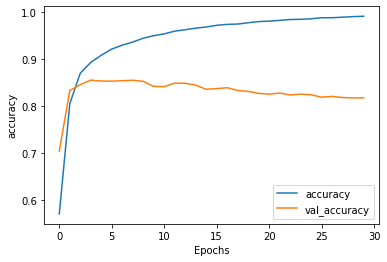

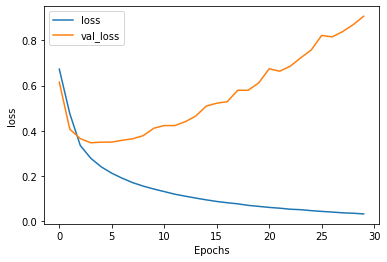

In [100]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [101]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [102]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [103]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [104]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[8.0189264e-01]
 [1.7586350e-04]]
